In [3]:
import pandas as pd
pd.__version__

'2.2.3'

In [20]:
import pickle

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
import sklearn
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
sklearn.__version__

'1.6.1'

In [6]:
def read_dataframe(filename, categorical, numerical):
    # combine all the preprocessing into a single cell
    df = pd.read_parquet(filename)

    df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df['duration_in_mins'] = df.duration.apply(lambda x: x.total_seconds() / 60)

    df = df[(df.duration_in_mins >= 1) & (df.duration_in_mins <= 60)]

    plt.hist(df.duration_in_mins, bins=50)

    df[categorical] = df[categorical].astype(str)

    return df

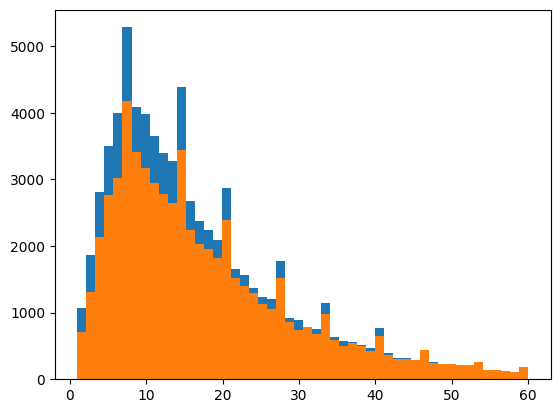

In [7]:
train_df = read_dataframe(filename='https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet', categorical=['PULocationID', 'DOLocationID' ], numerical=['trip_distance'])
val_df = read_dataframe(filename='https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet', categorical=['PULocationID', 'DOLocationID' ], numerical=['trip_distance'])

### Training the Model

In [8]:
#define a new feature
train_df['PO_DO'] = train_df['PULocationID'] + '_' + train_df['DOLocationID']
val_df['PO_DO'] = val_df['PULocationID'] + '_' + val_df['DOLocationID']

In [16]:
target = 'PO_DO'
categorical=['PULocationID', 'DOLocationID' ]
numerical=['trip_distance']

train_dict = pd.DataFrame(train_df[target]).to_dict(orient='records')
val_dict = pd.DataFrame(val_df[target]).to_dict(orient='records')

In [17]:
target = 'duration_in_mins'
y_train = train_df[target].values
y_val = val_df[target].values

In [18]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

In [19]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

root_mean_squared_error(y_pred, y_val)

7.480874659865807

In [21]:
with open('/models/lin_reg.bin', 'wb') as f_o:
    

SyntaxError: incomplete input (450696369.py, line 1)